In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("C:/Users/ahmet/OneDrive/Belgeler\VS-PY\Veri Setleri3\dogrusal_regresyon_veriseti_20220209.csv",sep=";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   deneyim  14 non-null     float64
 1   maas     14 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes


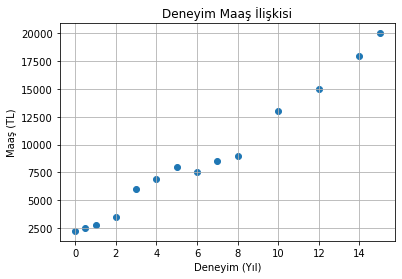

In [5]:
#görselleştirme
plt.scatter(df.deneyim, df.maas)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

## Doğrusal Regresyon Modeli Eğitimi

In [7]:
#Doğrusal Regresyon Modeli
linear_reg = LinearRegression()

#maaş ve deneyim sütunlarının numpy arraya dönüştürme
x=df.deneyim.values.reshape(-1,1)

y=df.maas.values.reshape(-1,1)

#Doğrusal regresyon eğitimi
linear_reg.fit(x,y)

LinearRegression()

In [8]:
#y ekseni kestiği nokta intercept bulunması
y_ekseni_kesisim =np.array([0]).reshape(1,-1)
b0=linear_reg.predict(y_ekseni_kesisim)
print("b0:",b0)

#y eksenini kestiği nokta (intercept)
b0_ =linear_reg.intercept_
print("b0_",b0_)

#eğim (slope) bulunması
b1=linear_reg.coef_
print("b1:",b1)

b0: [[1663.89519747]]
b0_ [1663.89519747]
b1: [[1138.34819698]]


In [39]:
#maas = 1663 +1138* deneyim

deneyim=11 #11 yıllık deneyim

maas_yeni=1663+1138*deneyim
print(maas_yeni)
##################################################################

#11 yıllık deneyim sahibi birisinin maaşı predict ile tahmin edilir
sonuc=linear_reg.predict(np.array([deneyim]).reshape(1,-1))
print("11 yıllık deneyime sahip birinin maaşı: {} TL".format(sonuc[0]))

14181
11 yıllık deneyime sahip birinin maaşı: [14185.72536421] TL


## Basit Doğrusal Regresyon Modeli

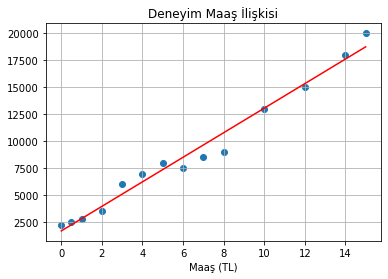

In [40]:
#Doğrusal Regresyon Modeli ile Test/tahmin/görselleştirme
array=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1) #sckit-learn'ün istediği format reshape

plt.figure()
plt.scatter(x,y)

#0-15 yılları arasında deneyime sahip insanların maaş tahmini
y_head = linear_reg.predict(array) #y_head=maaş

plt.plot(array, y_head, color="red")#
plt.xlabel("Deneyim (YIL)")
plt.xlabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

## Çoklu Regresyon

In [42]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [43]:
df=pd.read_csv("C:/Users/ahmet\OneDrive\Belgeler\VS-PY\Veri Setleri3\coklu_dogrusal_regresyon_veriseti_20220209.csv",sep=";")
df.head()

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [44]:
x= df.iloc[:,[0,2]].values #deneyim ve yaş bağımsız değişken
x

array([[ 0.5, 22. ],
       [ 0. , 21. ],
       [ 1. , 23. ],
       [ 5. , 25. ],
       [ 8. , 28. ],
       [ 4. , 23. ],
       [15. , 35. ],
       [ 7. , 29. ],
       [ 3. , 22. ],
       [ 2. , 23. ],
       [12. , 32. ],
       [10. , 30. ],
       [14. , 34. ],
       [ 6. , 27. ]])

In [15]:
y=df.maas.values.reshape(-1,1) #maaşı bağımlı değişken olarak almak
y

array([[ 2500],
       [ 2250],
       [ 2750],
       [ 8000],
       [ 9000],
       [ 6900],
       [20000],
       [ 8500],
       [ 6000],
       [ 3500],
       [15000],
       [13000],
       [18000],
       [ 7500]], dtype=int64)

## Çoklu regresyon modeli eğitimi

In [45]:
#model
coklu_dogrusal_regresyon =LinearRegression()

#eğitim
coklu_dogrusal_regresyon.fit(x,y)

LinearRegression()

In [46]:
#test1
test_verisi =np.array([[10,35]]) #deneyim=10 yaş=35
test_sonucu =coklu_dogrusal_regresyon.predict(test_verisi)
print("10 yıllık deneyim ve 35 yaş sonuce çıkan maaş: {}".format(test_sonucu[0]))

10 yıllık deneyim ve 35 yaş sonuce çıkan maaş: [11046.35815877]


In [47]:
test_verisi2 =np.array([[5,35]]) #deneyim=5 yaş=35
test_sonucu2 =coklu_dogrusal_regresyon.predict(test_verisi2)
print("5 yıllık deneyim ve 35 yaş sonuce çıkan maaş: {}".format(test_sonucu2[0]))

5 yıllık deneyim ve 35 yaş sonuce çıkan maaş: [3418.85455609]


## Polinomsal Regresyon

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [49]:
df=pd.read_csv("C:/Users/ahmet\OneDrive\Belgeler\VS-PY\Veri Setleri3\polinomsal_regresyon_veriseti_20220209.csv",sep=";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [51]:
#sklearn input olarak bumpy kabul eder
x= df.araba_fiyat.values.reshape(-1,1)
y= df.araba_max_hiz.values.reshape(-1,1)

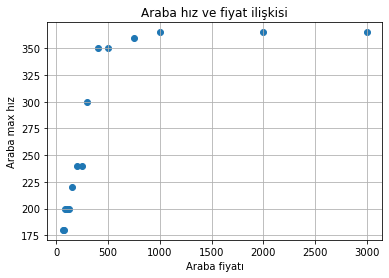

In [52]:
plt.scatter(x,y)
plt.ylabel("Araba max hız")
plt.xlabel("Araba fiyatı")
plt.title("Araba hız ve fiyat ilişkisi")
plt.grid(True)
plt.show()

In [53]:
#Doğrusal RegresyonDenemesi
lr=LinearRegression()

lr.fit(x,y)

LinearRegression()

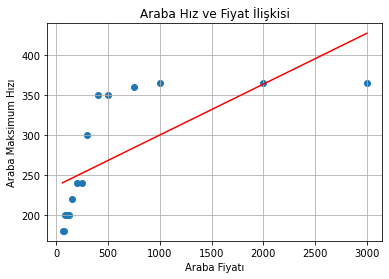

10 Milyon tl'lik araba hızı tahmini [[871.66401826]]


In [54]:
y_tahmin =lr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_tahmin, color="red")
plt.ylabel("Araba Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

araba_fiyatı=10000
print("10 Milyon tl'lik araba hızı tahmini",lr.predict((np.array([araba_fiyatı]).reshape(1,-1))))

In [59]:
#polinomsal regresyon = y=b0+b1*x+b2*x2.....bn*x^n

#polinomsal özellikler
polinom_regresyon = PolynomialFeatures(degree=4)#4. dereceden polinom_regresyon

x_polinom =polinom_regresyon.fit_transform(x)
x_polinom

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [60]:
# polinomsal regresyon eğitebilmek için polinomsal özellikler ile
lr2= LinearRegression()
lr2.fit(x_polinom,y)

LinearRegression()

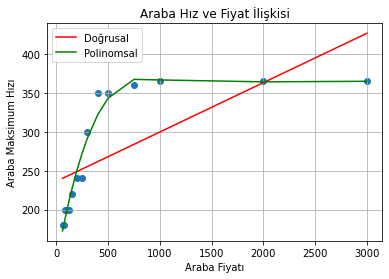

In [61]:
y_tahmin2 =lr2.predict(x_polinom)

plt.scatter(x,y)
plt.plot(x,y_tahmin, color="red", label="Doğrusal")
plt.plot(x,y_tahmin2, color="green", label="Polinomsal")
plt.legend()
plt.ylabel("Araba Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

## R² Testi

Regresyon modeli gözlenen verilere ne kadar iyi uyuyor.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [64]:
df=pd.read_csv("C:/Users/ahmet\OneDrive\Belgeler\VS-PY\Veri Setleri3\dogrusal_regresyon_veriseti_20220209.csv",sep=";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


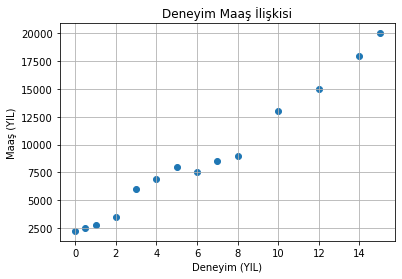

In [66]:
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim (YIL)")
plt.ylabel("Maaş (YIL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [67]:
x=df.deneyim.values.reshape(-1,1)
y=df.maas.values.reshape(-1,1)

In [68]:
polinom_regresyon =PolynomialFeatures(degree=2) #2. dereceden polinom

x_polinom =polinom_regresyon.fit_transform(x)

poly_reg=LinearRegression()
poly_reg.fit(x_polinom,y)

LinearRegression()

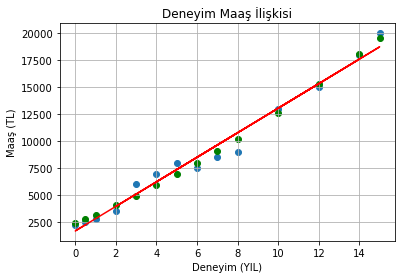

In [69]:
y_tahmin_linear = linear_reg.predict(x)
y_tahmin_poly=poly_reg.predict(x_polinom)

plt.scatter(df.deneyim,df.maas)
plt.plot(x, y_tahmin_linear, color="red", label="Doğrusal")
plt.scatter(x, y_tahmin_poly, color="green", label="Polinomsal")
plt.xlabel("Deneyim (YIL)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [73]:
print("Doğrusal Regresyon R kare   :",r2_score(y,y_tahmin_linear))
print("Polinomsal Regresyon R kare :",r2_score(y,y_tahmin_poly))

Doğrusal Regresyon R kare   : 0.9775283164949902
Polinomsal Regresyon R kare : 0.9854449464578782


## Sınıflandırma

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/ahmet\OneDrive\Belgeler\VS-PY\Veri Setleri3\ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


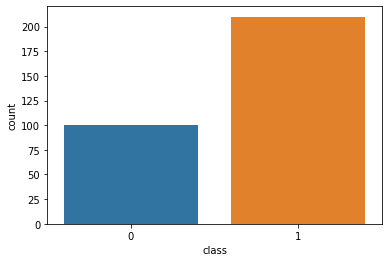

In [7]:
#abnormal ve normal 2 sınıf 
sns.countplot(data["class"])
plt.show()

In [8]:
#0-1 e dönüştürme
data["class"]=[1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [10]:
y=data["class"].values #sınıfların y değişkenine alınması
x_data=data.drop(["class"],axis=1) #özelliklerin x_data değişkeninin içerisine alınması

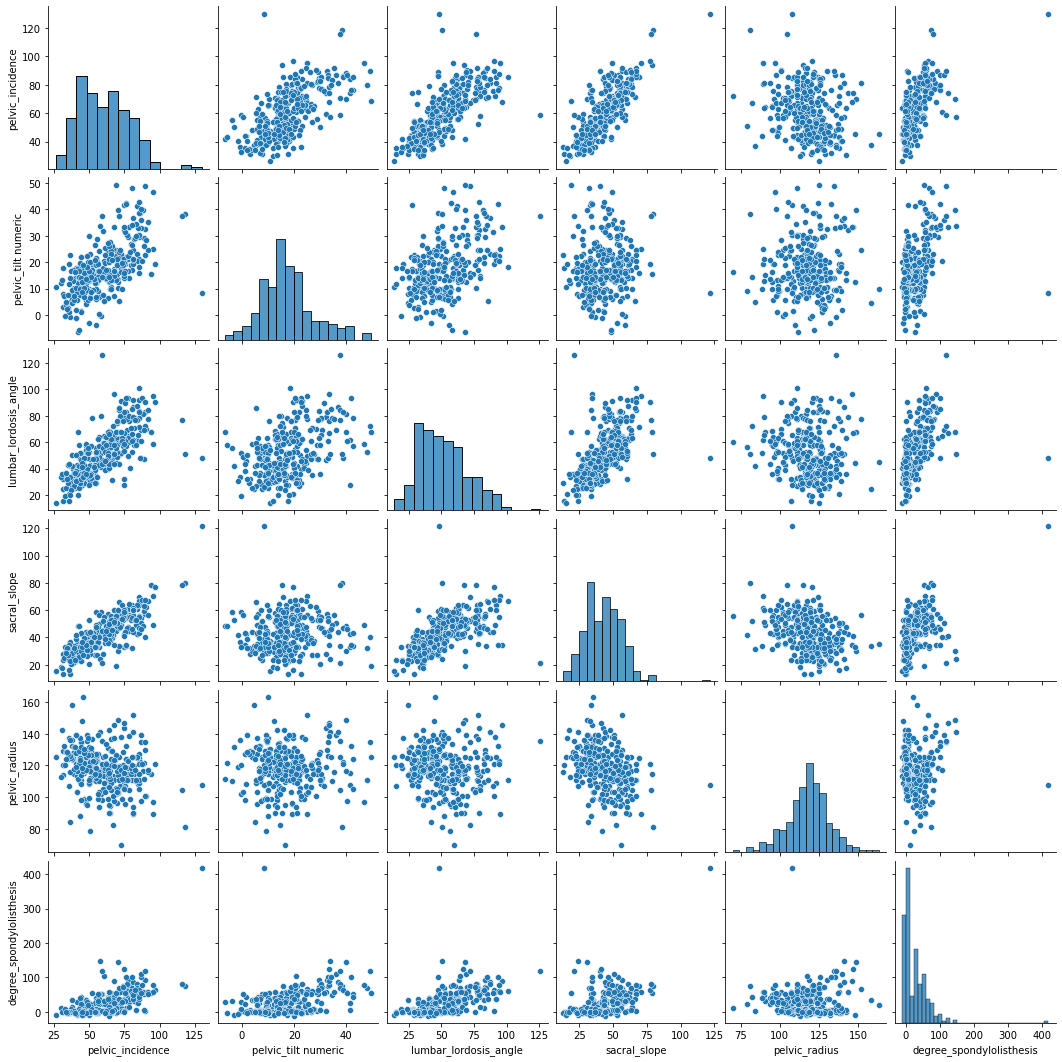

In [11]:
#veri özelliklerinin birbiri ile ilişkisi
sns.pairplot(x_data)
plt.show()

## Veriyi Normalize Etmek (min-max)

In [12]:
#
x= (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

## Gözetimli Öğrenmede Veri Setinin Eğitim/Test Olarak Bölünmesi

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=42) 
#test_size = %15 teste ayır, random_state = kaçıncı veri noktası test için olsun ve sabit kalsın 
x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T


print("x_train :",x_train.shape)
print("x_test  :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test  :",y_test.shape)

x_train : (6, 263)
x_test  : (6, 47)
y_train : (263,)
y_test  : (47,)


Parametrelerin ilk değerlerin atanması

In [16]:
def ilkdeger(boyut):
    w=np.full((boyut,1),0.01)
    b=0.0
    return w,b

In [17]:
#sigmoid
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

sigmoid(0)

0.5

İleri / Geri Yayılma